# Project Name : 
# Seoul-Bike-Sharing-Demand-Prediction


### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Collection

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")
print(df.shape)




(8760, 14)


In [3]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# Data Preprocessing

#### 1. Missing Values Handle

In [6]:
df.isnull().sum()    # check missing
df.dropna()          # remove missing rows
df.fillna(0)         # fill with 0


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#### 2. Duplicate Rows Remove

In [7]:

df.duplicated().sum()  # check duplicates
df.drop_duplicates(inplace=True)  # remove duplicates


#### 3. Date Format Convertion

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


# Feature Engineering

#### 1. Date/Time Features Extract

In [9]:
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Weekday"] = df["Date"].dt.day_name()

df = df.drop('Date', axis=1)

#### 2. Label Encoding (Binary Yes/No type)

In [10]:
le = LabelEncoder()

df['Holiday'] = le.fit_transform(df['Holiday'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])



#### 3. One-Hot Encoding (Multi-category columns)

In [11]:
df = pd.get_dummies(df, columns=['Seasons', 'Weekday'])
print(df.columns)




Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Weekday_Friday',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')


# EDA (Exploratory Data Analysis)

#### 1. Univariate Analysis

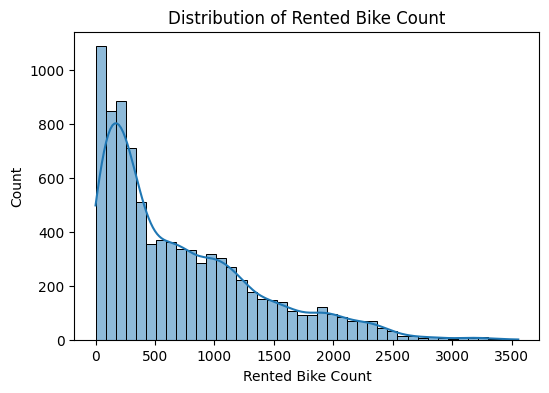

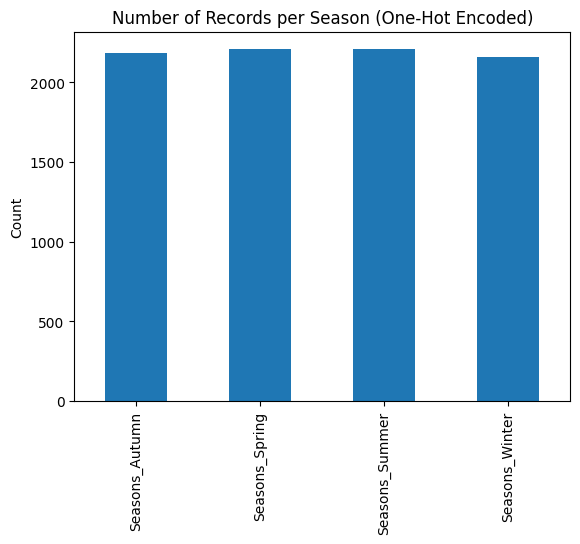

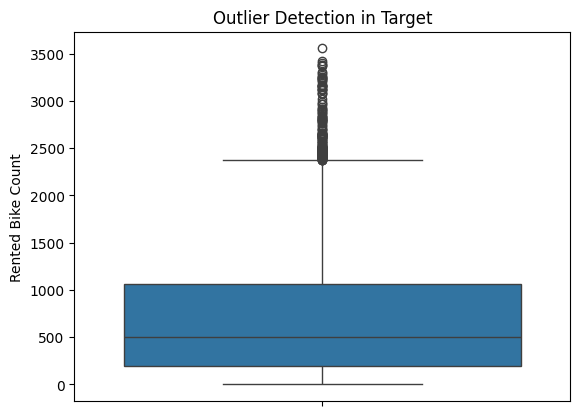

In [12]:
# Distribution of Target (Bike Count)
plt.figure(figsize=(6, 4))
sns.histplot(df['Rented Bike Count'], kde=True)
plt.title("Distribution of Rented Bike Count")
plt.show()


# Count of records for each season (after encoding)
season_cols = ['Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']
df[season_cols].sum().plot(kind='bar')
plt.title("Number of Records per Season (One-Hot Encoded)")
plt.ylabel("Count")
plt.show()


# Boxplot to detect outliers
sns.boxplot(y='Rented Bike Count', data=df)
plt.title("Outlier Detection in Target")
plt.show()


#### 2. Bivariate Analysis

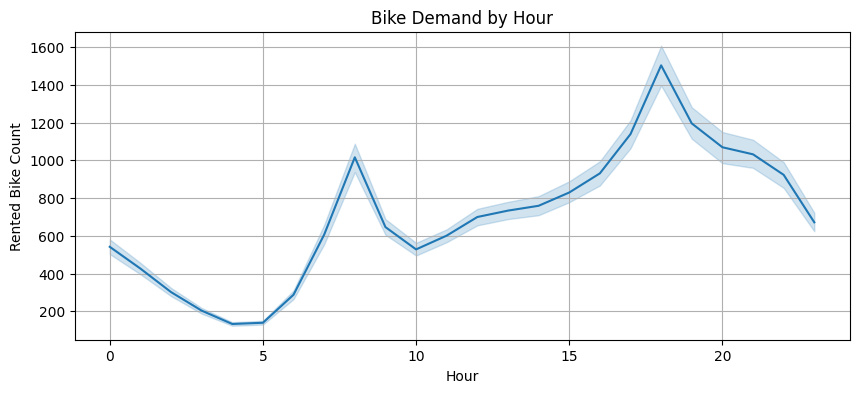

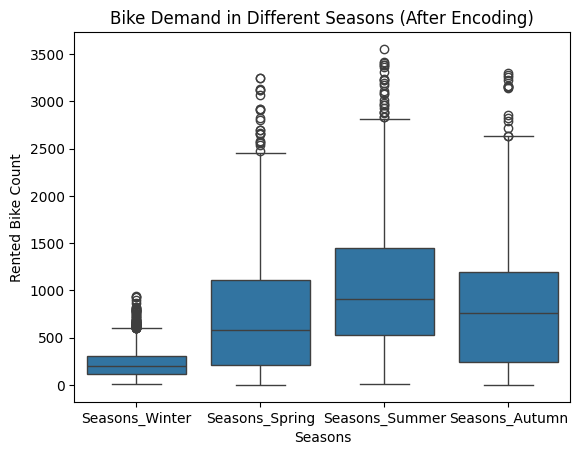

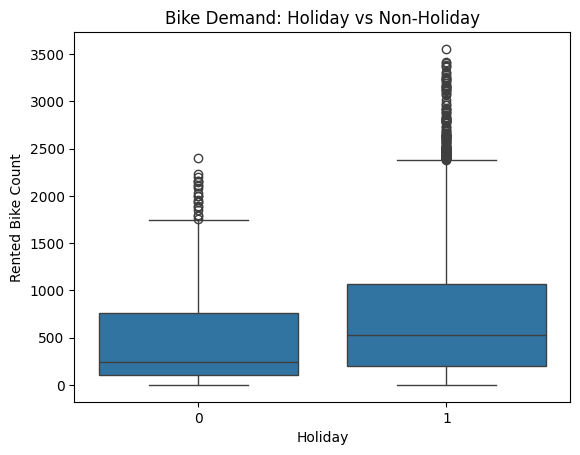

In [13]:
# Bike count vs Hour
plt.figure(figsize=(10, 4))
sns.lineplot(x='Hour', y='Rented Bike Count', data=df)
plt.title("Bike Demand by Hour")
plt.grid()
plt.show()

# Boxplot: Season vs Rented Bike Count
# Make a fake 'Seasons' column from one-hot columns
def get_season(row):
    if row['Seasons_Autumn'] == 1:
        return 'Seasons_Autumn'
    elif row['Seasons_Spring'] == 1:
        return 'Seasons_Spring'
    elif row['Seasons_Summer'] == 1:
        return 'Seasons_Summer'
    else:
        return 'Seasons_Winter'

df['Seasons'] = df.apply(get_season, axis=1)

# Now plot again
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title("Bike Demand in Different Seasons (After Encoding)")
plt.show()


# Boxplot: Holiday effect
sns.boxplot(x='Holiday', y='Rented Bike Count', data=df)
plt.title("Bike Demand: Holiday vs Non-Holiday")
plt.show()


#### 3. Multivariate Analysis

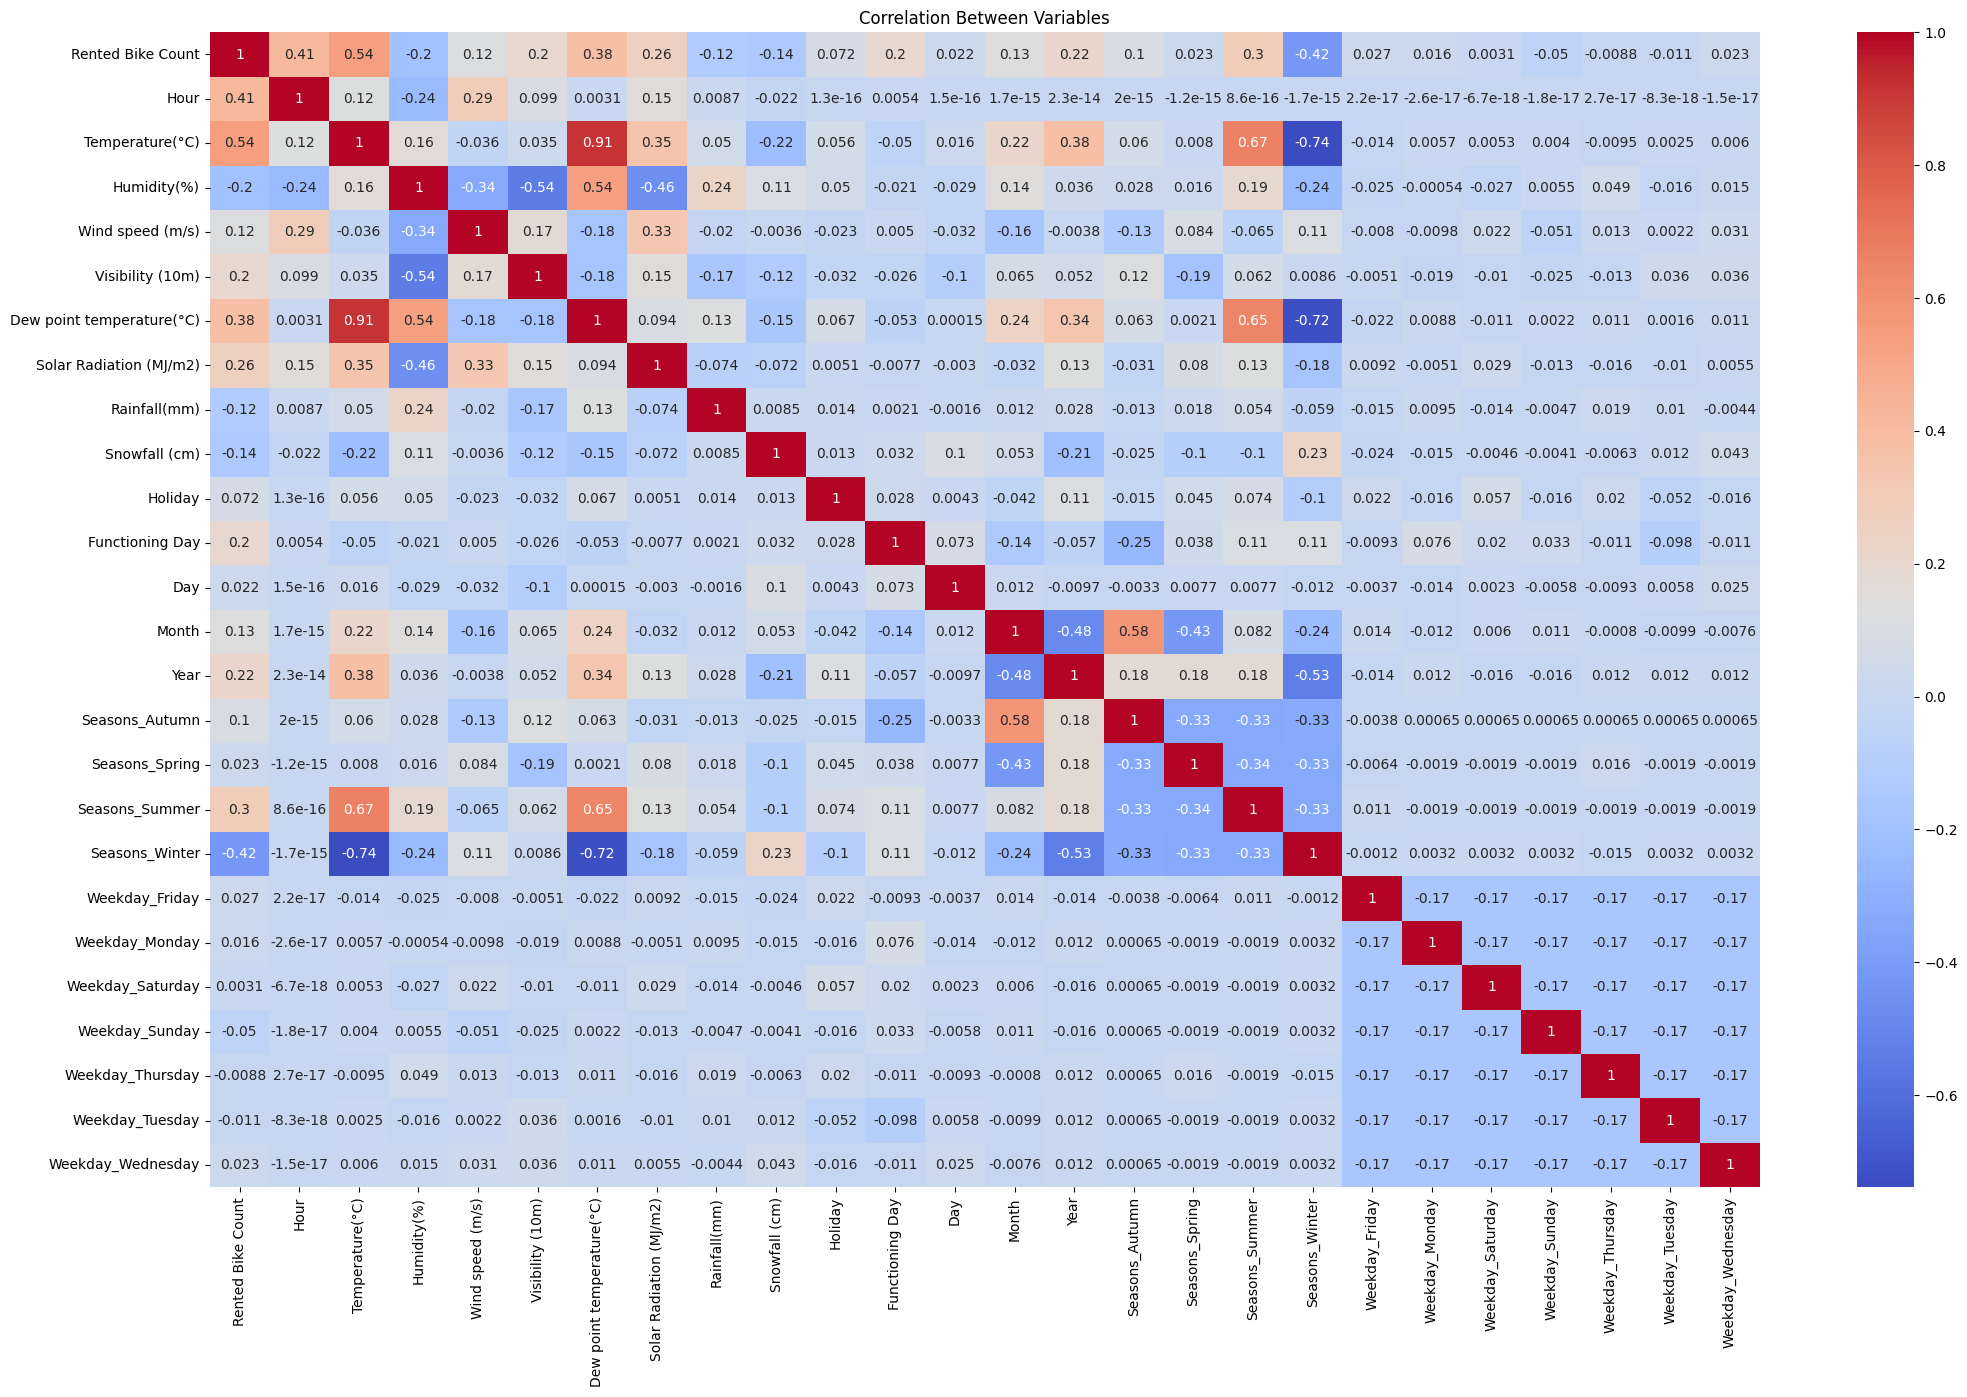

In [14]:
# Correlation Heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()



#### Check for Multicollinear Columns

In [15]:
# Step 1: Correlation matrix
corr = df.corr(numeric_only=True)

# Step 2: Check and print high correlation pairs
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2 and abs(corr[col1][col2]) > 0.8:
            print(f"{col1}  ⟷  {col2}  = {corr[col1][col2]:.2f}")

Temperature(°C)  ⟷  Dew point temperature(°C)  = 0.91
Dew point temperature(°C)  ⟷  Temperature(°C)  = 0.91


In [16]:
df.drop(columns=['Seasons'], inplace=True)
print(df.columns.tolist())


['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday']


#### Outlier Detection & Removal

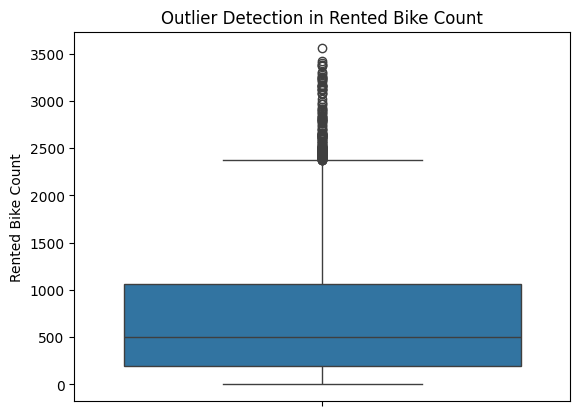

In [17]:
sns.boxplot(y=df['Rented Bike Count'])
plt.title("Outlier Detection in Rented Bike Count")
plt.show()

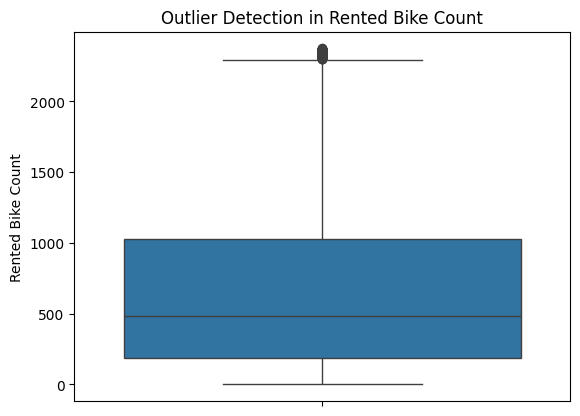

In [18]:
# Q1 = 25th percentile, Q3 = 75th percentile
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Rented Bike Count'] >= lower_bound) & (df['Rented Bike Count'] <= upper_bound)]


sns.boxplot(y=df['Rented Bike Count'])
plt.title("Outlier Detection in Rented Bike Count")
plt.show()

## Split Data for Training & Testing

In [19]:
x = df.drop(columns=['Rented Bike Count'], axis=1)  # X = features
y = df['Rented Bike Count']                 # y = target


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2023)
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (6881, 25)
Shape of x_test :  (1721, 25)
Shape of y_train :  (6881,)
Shape of y_test :  (1721,)


X = df.drop(columns=['Rented Bike Count'])  # X = features
y = df['Rented Bike Count']                 # y = target


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2023)
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

# Feature Scalling

In [20]:
#convert all data unit into single unit
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)  # Fit + transform on training data
x_test = scaler.transform(x_test)        # Only transform test data

In [21]:
x_train[0]

array([ 1.09754266, -0.39828485, -1.48308439,  0.17686157,  0.89789606,
       -1.02097915, -0.60458501, -0.1335932 , -0.17218376,  0.22834332,
        0.19214534, -0.53914184, -1.01559445,  0.30907311, -0.58288813,
        1.7409907 , -0.56879149, -0.58333565, -0.41115106, -0.4067936 ,
       -0.40994263,  2.42507732, -0.4089748 , -0.40412079, -0.40436409])

# Training ML Model
## Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
round(lr.score(x_test, y_test)*100,2) # training accuracy

54.19

## Model Evaluation

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("MAE: ", MAE)
print("R2: ", R2)



MSE:  155240.84406643923
RMSE:  394.0061472444805
MAE:  300.0405807677733
R2:  0.5419415575397671


In [24]:
def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    
    print("Model name:", model_name)
    print("Mean Squared Error:", round(MSE,3))
    print("Root Mean Squared Error:", round(RMSE,3))
    print("Mean Absolute Error:", round(MAE,3))
    print("R Squared Error:", round(R2,3))

In [25]:
get_metrics(y_test,y_pred,"LinearRegression")

Model name: LinearRegression
Mean Squared Error: 155240.844
Root Mean Squared Error: 394.006
Mean Absolute Error: 300.041
R Squared Error: 0.542


## Train Multiple Models

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [27]:

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

poly_r = LinearRegression().fit(x_train_poly, y_train)
y_pred_poly = poly_r.predict(x_test_poly)

svr = SVR().fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)


dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)


In [28]:

get_metrics(y_test, y_pred_poly,"PolynomialFeatures")
print("\n")
get_metrics(y_test, y_pred_svr,"SVR")
print("\n")
get_metrics(y_test, y_pred_dtr,"DecisionTreeRegressor")
print("\n")
get_metrics(y_test, y_pred_rfr,"RandomForestRegressor")


Model name: PolynomialFeatures
Mean Squared Error: 99483.999
Root Mean Squared Error: 315.411
Mean Absolute Error: 221.674
R Squared Error: 0.706


Model name: SVR
Mean Squared Error: 258746.934
Root Mean Squared Error: 508.672
Mean Absolute Error: 359.001
R Squared Error: 0.237


Model name: DecisionTreeRegressor
Mean Squared Error: 55223.36
Root Mean Squared Error: 234.997
Mean Absolute Error: 136.285
R Squared Error: 0.837


Model name: RandomForestRegressor
Mean Squared Error: 26450.341
Root Mean Squared Error: 162.636
Mean Absolute Error: 98.861
R Squared Error: 0.922


# Cross Validation

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# 1. Model bana
model = RandomForestRegressor(random_state=42)

# 2. Cross-validation (5-fold)
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# 3. Output
print("Cross-Validation R² scores:", scores)
print("Average R² score:", scores.mean())

Cross-Validation R² scores: [0.91262479 0.93665276 0.9144609  0.91801472 0.91187662]
Average R² score: 0.9187259599000843


# Hyperparameter Tuning

In [35]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV


model = RandomForestRegressor(random_state=42)

# Hyperparameters ke liye grid define kar rahe hain
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV ka use kar rahe hain hyperparameter tuning ke liye
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='r2')

# Tuning ko fit karte hain
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Best model se prediction karte hain
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)

# Test data par R² score
from sklearn.metrics import r2_score
print("Test Data R² Score:", r2_score(y_test, predictions))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8950518413667043
Test Data R² Score: 0.9221532583966027


## Save ML Model

In [36]:
import pickle

pickle.dump(best_model, open(r"models/rfr_model.pkl", "wb"))


## Dump Scaling Parameter

In [37]:

pickle.dump(scaler, open(r"models/scaler.pkl", "wb"))
